In [43]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data

import pandas as pd


df_vaccine = pd.read_csv('vaccination_data.csv')
df_case_death = pd.read_csv('WHO_COVID_19_global_table_data.csv')



In [44]:
#Check the columns and values of the dataframes
df_vaccine

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_LAST_DOSE,PERSONS_LAST_DOSE_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Aruba,ABW,AMRO,REPORTING,2023-12-29,217124.0,90493.0,203.0,85.0,84363.0,79.0,NaN,2021-02-17,NaN,35659.0,33.0
1,Afghanistan,AFG,EMRO,REPORTING,2023-12-31,22964750.0,19151369.0,59.0,49.0,18370386.0,47.0,NaN,2021-02-22,NaN,2729940.0,7.0
2,Angola,AGO,AFRO,REPORTING,2023-12-31,27819132.0,16550642.0,85.0,50.0,9609080.0,29.0,NaN,2021-03-10,NaN,3067091.0,9.0
3,Anguilla,AIA,AMRO,REPORTING,2023-12-29,24864.0,10858.0,166.0,72.0,10382.0,69.0,NaN,2021-02-05,NaN,3231.0,22.0
4,Albania,ALB,EURO,REPORTING,2023-12-23,3088966.0,1349255.0,107.0,47.0,1279333.0,44.0,NaN,2021-01-13,NaN,402371.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,"Taiwan, China",TWN,NaN,REPORTING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,Viet Nam,VNM,WPRO,REPORTING,2023-06-30,266492149.0,90497674.0,274.0,93.0,85961564.0,88.0,NaN,2021-03-08,NaN,57975220.0,60.0
212,Vanuatu,VUT,WPRO,REPORTING,2023-02-20,355430.0,176624.0,116.0,58.0,162250.0,53.0,NaN,2021-06-02,NaN,16556.0,5.0
213,Wallis and Futuna,WLF,WPRO,REPORTING,2023-01-23,17303.0,7150.0,154.0,64.0,6803.0,60.0,NaN,2021-03-19,NaN,3350.0,30.0


In [45]:
df_case_death

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994048.0,10520.0,NaN,NaN,NaN,7118.0,75.0,NaN,NaN,NaN
1,China,Western Pacific,99381761.0,6755.0,0.0,NaN,0.0,122398.0,8.0,0.0,NaN,0.0
2,French Guiana,NaN,98041.0,32825.0,NaN,NaN,NaN,413.0,138.0,NaN,NaN,NaN
3,Latvia,Europe,977775.0,51255.0,NaN,NaN,NaN,7585.0,398.0,2.0,NaN,2.0
4,Saint Vincent and the Grenadines,Americas,9674.0,8720.0,NaN,NaN,NaN,124.0,112.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
236,Argentina,Americas,10111872.0,22373.0,71.0,NaN,71.0,130747.0,289.0,NaN,NaN,NaN
237,Democratic Republic of the Congo,Africa,101006.0,113.0,NaN,NaN,NaN,1474.0,2.0,NaN,NaN,NaN
238,Nepal,South-East Asia,1003450.0,3444.0,NaN,NaN,NaN,12031.0,41.0,NaN,NaN,NaN
239,Democratic People's Republic of Korea,South-East Asia,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [46]:
#sorting the values by vaccination rate to the last dose
df_vaccine_sorted_ld = df_vaccine.sort_values(by="PERSONS_LAST_DOSE_PER100", ascending=False)

#filter the small population countries to get more representative
df_vaccine_sorted_ld_filtered = df_vaccine_sorted_ld[df_vaccine_sorted_ld['PERSONS_VACCINATED_1PLUS_DOSE'] > 1000000]

#filter out the top 20 countries with the highest vaccination rate
df_top_20 = df_vaccine_sorted_ld_filtered.head(20)

#make it a list to connect with the data from the death case dataframe
top_20 = df_top_20["COUNTRY"].tolist()



In [47]:
#also filtering out the small population

df_case_death_filtered = df_case_death[df_case_death["Cases - cumulative total"] > 10000]
df_case_death_filtered

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Belarus,Europe,994048.0,10520.0,NaN,NaN,NaN,7118.0,75.0,NaN,NaN,NaN
1,China,Western Pacific,99381761.0,6755.0,0.0,NaN,0.0,122398.0,8.0,0.0,NaN,0.0
2,French Guiana,NaN,98041.0,32825.0,NaN,NaN,NaN,413.0,138.0,NaN,NaN,NaN
3,Latvia,Europe,977775.0,51255.0,NaN,NaN,NaN,7585.0,398.0,2.0,NaN,2.0
9,Senegal,Africa,89334.0,534.0,NaN,NaN,NaN,1972.0,12.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
234,Eritrea,Africa,10189.0,287.0,NaN,NaN,NaN,103.0,3.0,NaN,NaN,NaN
235,Mongolia,Western Pacific,1011489.0,30854.0,NaN,NaN,NaN,2136.0,65.0,NaN,NaN,NaN
236,Argentina,Americas,10111872.0,22373.0,71.0,NaN,71.0,130747.0,289.0,NaN,NaN,NaN
237,Democratic Republic of the Congo,Africa,101006.0,113.0,NaN,NaN,NaN,1474.0,2.0,NaN,NaN,NaN


In [48]:
#find the mean values of the death rate of the world

median_value_of_cumulative_total_per_100k_pepulation = df_case_death_filtered['Deaths - cumulative total per 100000 population'].mean()
median_value_of_cumulative_total_per_100k_pepulation

np.float64(285.3712871287129)

In [49]:
#find the mean values of the death rate of the top vaccination countries
cumulative_total_per_100k_populationof_top_20_vaccinated = df_case_death[df_case_death['Name'].isin(top_20)]
mean_value_cumulative_total_per_100k_populationof_top_20_vaccinated = cumulative_total_per_100k_populationof_top_20_vaccinated['Deaths - cumulative total per 100000 population'].mean()
mean_value_cumulative_total_per_100k_populationof_top_20_vaccinated

np.float64(130.35)

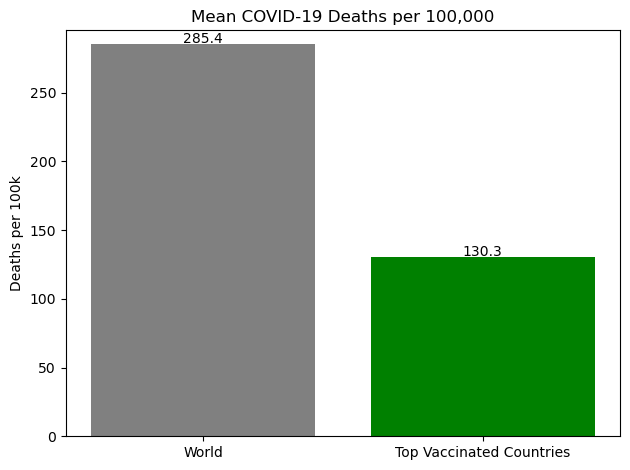

In [50]:

#make the plot
labels = ['World', 'Top Vaccinated Countries']
values = [median_value_of_cumulative_total_per_100k_pepulation, mean_value_cumulative_total_per_100k_populationof_top_20_vaccinated]
 
plt.bar(labels, values, color=['gray', 'green'])
plt.title("Mean COVID-19 Deaths per 100,000")
plt.ylabel("Deaths per 100k")
plt.ylim(0, max(values) + 10)

for i, v in enumerate(values):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center')

plt.tight_layout()
plt.show()
